# Analyzing sentiment in customer reviews, social media comments, or product 
feedback to determine whether the sentiment is positive, negative, or neutral.
1. Sentiment Analysis:

In [ ]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('IMDB Dataset.csv')
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
data.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
data.groupby('sentiment').size()

sentiment
negative    25000
positive    25000
dtype: int64

In [6]:
data.isna().sum()

review       0
sentiment    0
dtype: int64

In [7]:
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
corpus=[]
for i in range(0,1000):
    review=re.sub('[^a-zA-Z]',' ',data['review'][i])
    review=review.lower()
    review=review.split()
    ps=PorterStemmer()
    review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review=' '.join(review)
    corpus.append(review)

In [9]:
corpus_dataset=pd.DataFrame(corpus)
corpus_dataset.head()

,0
0,one review mention watch oz episod hook right ...
1,wonder littl product br br film techniqu unass...
2,thought wonder way spend time hot summer weeke...
3,basic famili littl boy jake think zombi closet...
4,petter mattei love time money visual stun film...


In [10]:
corpus_dataset['corpus']=corpus_dataset
corpus_dataset.head()

,0,corpus
0,one review mention watch oz episod hook right ...,one review mention watch oz episod hook right ...
1,wonder littl product br br film techniqu unass...,wonder littl product br br film techniqu unass...
2,thought wonder way spend time hot summer weeke...,thought wonder way spend time hot summer weeke...
3,basic famili littl boy jake think zombi closet...,basic famili littl boy jake think zombi closet...
4,petter mattei love time money visual stun film...,petter mattei love time money visual stun film...


In [11]:
corpus_dataset=corpus_dataset.drop([0],axis=1)
corpus_dataset.head()

,corpus
0,one review mention watch oz episod hook right ...
1,wonder littl product br br film techniqu unass...
2,thought wonder way spend time hot summer weeke...
3,basic famili littl boy jake think zombi closet...
4,petter mattei love time money visual stun film...


In [12]:
#Create a BOW Model
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
x=cv.fit_transform(corpus).toarray()


In [13]:
x.shape


(1000, 12331)

In [14]:
len(cv.get_feature_names_out())

12331

In [15]:
y=data.iloc[:1000,1].values
y

array(['positive', 'positive', 'positive', 'negative', 'positive',
       'positive', 'positive', 'negative', 'negative', 'positive',
       'negative', 'negative', 'negative', 'negative', 'positive',
       'negative', 'positive', 'negative', 'positive', 'negative',
       'positive', 'negative', 'positive', 'negative', 'negative',
       'positive', 'positive', 'negative', 'negative', 'positive',
       'positive', 'positive', 'negative', 'positive', 'negative',
       'negative', 'negative', 'negative', 'positive', 'negative',
       'negative', 'positive', 'negative', 'negative', 'positive',
       'positive', 'negative', 'negative', 'positive', 'negative',
       'positive', 'positive', 'positive', 'positive', 'negative',
       'negative', 'negative', 'negative', 'positive', 'positive',
       'negative', 'negative', 'positive', 'negative', 'negative',
       'positive', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'positive', 'positive', 'negati

In [16]:
x.shape

(1000, 12331)

In [17]:
y.shape

(1000,)

In [18]:
#splitting data for training and testing
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

#model build
from sklearn.naive_bayes import GaussianNB
gauss_clf=GaussianNB()
#training
print('='*70)
print('Training started....  ')
gauss_clf.fit(xtrain,ytrain)
print('\ntesting in progress....')
ypred=gauss_clf.predict(xtest)
print('Predicted class:\n',ypred)
print('='*70)

#Performance Metrics
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print('Confusion matrix:\n',confusion_matrix(ytest,ypred))
print('='*70)
print('Accuracy score:\t',accuracy_score(ytest,ypred))
print('='*70)
print('Classification report:\n',classification_report(ytest,ypred))
print('='*70)

Training started....  

testing in progress....
Predicted class:
 ['negative' 'negative' 'negative' 'positive' 'positive' 'negative'
 'positive' 'negative' 'negative' 'positive' 'negative' 'negative'
 'negative' 'negative' 'positive' 'negative' 'negative' 'negative'
 'negative' 'positive' 'positive' 'positive' 'positive' 'negative'
 'positive' 'positive' 'positive' 'positive' 'negative' 'positive'
 'positive' 'negative' 'negative' 'positive' 'negative' 'negative'
 'positive' 'negative' 'positive' 'positive' 'negative' 'positive'
 'negative' 'positive' 'negative' 'positive' 'negative' 'positive'
 'negative' 'positive' 'positive' 'negative' 'positive' 'positive'
 'positive' 'negative' 'negative' 'positive' 'negative' 'negative'
 'positive' 'positive' 'negative' 'positive' 'negative' 'positive'
 'negative' 'positive' 'negative' 'negative' 'positive' 'negative'
 'positive' 'negative' 'negative' 'positive' 'positive' 'negative'
 'negative' 'negative' 'positive' 'positive' 'positive' 'negati

<Axes: >

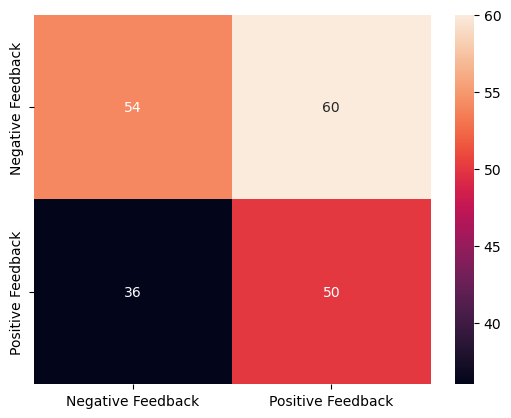

In [19]:
import seaborn as sns

cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True,xticklabels=['Negative Feedback','Positive Feedback'],
           yticklabels=['Negative Feedback','Positive Feedback'])

# 2. Text Classification:
Categorizing text documents into predefined categories or classes, such as 
classifying news articles into topics like sports, politics, technology, etc.

In [22]:
import warnings
warnings.filterwarnings('ignore')

from fuzzywuzzy import process
from fuzzywuzzy import fuzz
from sklearn.datasets import fetch_20newsgroups

newsgroup_train=fetch_20newsgroups(subset='train',shuffle=True)
newsgroup_test = fetch_20newsgroups(subset='test',shuffle=True)

In [23]:
newsgroup_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [24]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer,SnowballStemmer
from nltk.stem.porter import *
import numpy as np
import pandas as pd
stemmer=SnowballStemmer('english')
np.random.seed(400)

In [25]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='v'))

def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token)>3:
            result.append(lemmatize_stemming(token))
    return result

In [26]:
processed_docs=[]
for doc in newsgroup_train.data:
     x=preprocess(doc)
     x=' '.join(x)
     processed_docs.append(x)
        
print(processed_docs[2])

twilli purdu thoma willi subject question organ purdu univers engin network distribut line folk plus final give ghost weekend start life sooo market machin sooner intend look pick powerbook mayb bunch question hope somebodi answer anybodi know dirt round powerbook introduct expect hear suppos appear summer haven hear anymor access macleak wonder anybodi info anybodi hear rumor price drop powerbook line like one go recent impress display probabl swing disk feel better display look great store good solicit opinion peopl worth take disk size money activ display realiz real subject question play machin store breifli figur opinion somebodi actual use machin daili prove help hellcat perform thank bunch advanc info email post summari news read time premium final corner willi twilli purdu purdu electr engin convict danger enemi truth lie nietzsch


In [27]:
print(processed_docs[0])

lerxst thing subject nntp post host organ univers maryland colleg park line wonder enlighten door sport look late earli call bricklin door small addit bumper separ rest bodi know tellm model engin spec year product histori info funki look mail thank bring neighborhood lerxst


In [28]:
x=process.extract(processed_docs[0],newsgroup_train.target_names)
x

[('rec.sport.baseball', 57),
 ('rec.sport.hockey', 57),
 ('comp.windows.x', 26),
 ('sci.crypt', 26),
 ('soc.religion.christian', 25)]

In [29]:
len(processed_docs)

11314

In [30]:
group=[]
for doc in processed_docs:
    article_cat=[]
    x=process.extract(doc,newsgroup_train.target_names)
    cls_name=x.pop(0)[0]
    article_cat.append(doc)
    article_cat.append(cls_name)
    group.append(article_cat)

In [31]:
len(group)

11314

In [32]:
df = pd.DataFrame(group, columns=['Article', 'Categories']) 

In [33]:
df.head()

,Article,Categories
0,lerxst thing subject nntp post host organ univ...,rec.sport.baseball
1,guykuo carson washington subject clock poll fi...,rec.sport.baseball
2,twilli purdu thoma willi subject question orga...,alt.atheism
3,jgreen amber green subject weitek organ harri ...,comp.windows.x
4,head harvard jonathan mcdowel subject shuttl l...,misc.forsale


In [34]:
df.shape

(11314, 2)

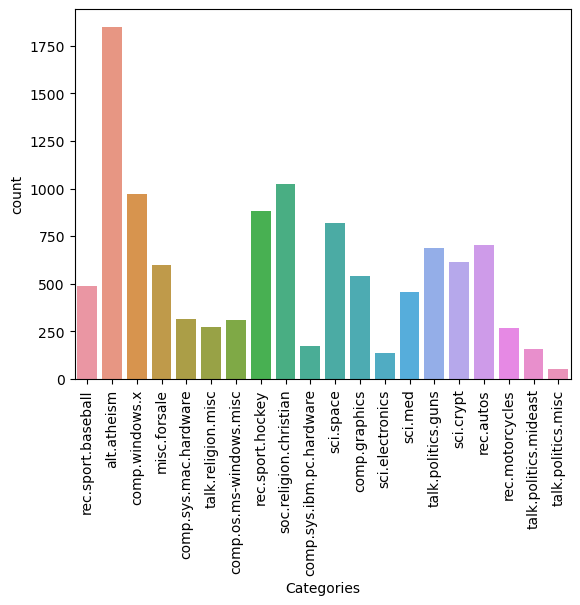

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x ='Categories', data = df)
plt.xticks(rotation=90)
plt.show()


# 3. Named Entity Recognition (NER):
Identifying and classifying entities mentioned in text, such as names of persons, 
organizations, locations, dates, etc.

In [40]:


nlp = spacy.load("en_core_web_sm")
text = "MCU started by kevin fiege in 2008 in newyork"


doc = nlp(text)


for ent in doc.ents:
    print(f"Entity: {ent.text}, Type: {ent.label_}")

Entity: MCU, Type: ORG
Entity: kevin, Type: PERSON
Entity: 2008, Type: DATE
